Signature Comparison

Task Number : 3 

company : opoint 

Link data : https://www.kaggle.com/datasets/divyanshrai/handwritten-signatures/download

Source code : https://www.kaggle.com/code/nymikapasnoori/signature-forgery-detection/notebook 

Editor and Changer : Ali Talebi  

Email : alitalebishahroodi@gmail.com 


https://www.kaggle.com/code/nymikapasnoori/signature-forgery-detection/notebook

In [7]:
!kaggle datasets download -d divyanshrai/handwritten-signatures

 99% 368M/370M [00:02<00:00, 154MB/s]
100% 370M/370M [00:02<00:00, 132MB/s]


In [6]:
from google.colab import files
files.upload() #this will prompt you to update the json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

Saving kaggle.json to kaggle.json
kaggle.json


In [8]:
!unzip '/content/handwritten-signatures.zip'

Archive:  /content/handwritten-signatures.zip
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100002.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100003.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100004.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100005.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100006.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100007.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100008.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100009.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100010.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100011.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/forge/02100012.png  
  inflating: Dataset_Signature_Final/Dataset/dataset1/

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2 
import glob


In [13]:
#cv2.show('/content/sample_signature/sample_Signature/genuine/NFI-00101001.png')
img = cv2.imread('/content/sample_signature/sample_Signature/genuine/NFI-00101001.png')

In [15]:
img.shape

(735, 1460, 3)

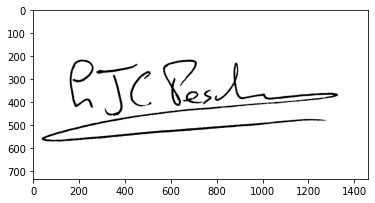

In [17]:
plt.imshow(img)
plt.show()

In [19]:
gen = [glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset2forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [21]:
import glob
import keras
import cv2

# gen = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/*.*")
# forg = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/forged/*.*")
# ../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00101014.png

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [24]:
test_data.shape

(180, 224, 224, 3)

In [25]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [34]:
train_labels = train_labels.reshape(-1 , 1 )
test_labels = test_labels.reshape(-1 , 1 )

In [35]:
train_labels.shape 

(480, 1)

In [49]:
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.utils import to_categorical 

In [53]:
train_labels = to_categorical(train_labels , 2 )
test_labels  = to_categorical(test_labels , 2 ) 

In [54]:


network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
network.add(Flatten())
network.add(Dense(128,activation = 'relu'))
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [55]:
network.compile(optimizer = Adam(learning_rate=0.001 , decay = 0.001 / 25 ) , loss = 'binary_crossentropy' , metrics = ['acc'])
alis = network.fit(train_data , train_labels , epochs = 50 , validation_split = 0.2 )

Epoch 1/50
12/12 [==============================] - 27s 2s/step - loss: 0.9142 - acc: 0.5104 - val_loss: 0.6908 - val_acc: 0.5938
Epoch 2/50
12/12 [==============================] - 25s 2s/step - loss: 0.6824 - acc: 0.6146 - val_loss: 0.6859 - val_acc: 0.5521
Epoch 3/50
12/12 [==============================] - 25s 2s/step - loss: 0.6709 - acc: 0.5990 - val_loss: 0.6925 - val_acc: 0.5521
Epoch 4/50
12/12 [==============================] - 25s 2s/step - loss: 0.5946 - acc: 0.6432 - val_loss: 0.5950 - val_acc: 0.6562
Epoch 5/50
12/12 [==============================] - 25s 2s/step - loss: 0.5252 - acc: 0.7083 - val_loss: 0.6587 - val_acc: 0.6562
Epoch 6/50
12/12 [==============================] - 25s 2s/step - loss: 0.4125 - acc: 0.8307 - val_loss: 0.4619 - val_acc: 0.8229
Epoch 7/50
12/12 [==============================] - 25s 2s/step - loss: 0.2941 - acc: 0.8724 - val_loss: 0.7931 - val_acc: 0.7604
Epoch 8/50
12/12 [==============================] - 25s 2s/step - loss: 0.2344 - acc: 0.91

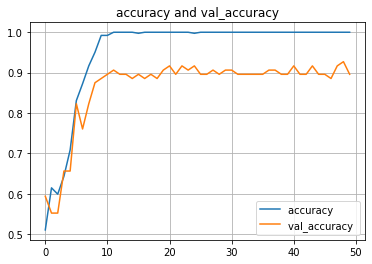

In [64]:
plt.plot(range(50) , alis.history['acc'] , label = 'accuracy ')
plt.plot(range(50) , alis.history['val_acc'] , label = 'val_accuracy ')
plt.grid()
plt.title("accuracy and val_accuracy")
plt.legend()
plt.show()


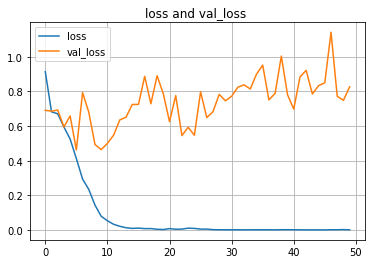

In [65]:
plt.plot(range(50) , alis.history['loss'] , label = 'loss')
plt.plot(range(50) , alis.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.title("loss and val_loss ")
plt.legend()
plt.grid()
plt.show()

In [68]:
network.evaluate(test_data , test_labels )
## first data is : loss 
## second data is : accuracy 

6/6 [==============================] - 3s 460ms/step - loss: 4.3886 - acc: 0.7167


[4.388598442077637, 0.7166666388511658]

Please Enter a Number From 0 to 179 :  13


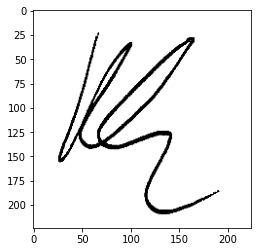

 Real  Labels is : ----->  1
Predicted Labels is : ------>  0


In [97]:
n = int(input("Please Enter a Number From 0 to 179 :  "))
plt.imshow(test_data[n])
plt.show()
print( ' Real  Labels is : -----> ' , np.argmax(test_labels[0]) )
a = []
a.append(test_data[n])
a = np.array(a)
print('Predicted Labels is : ------> ' , np.argmax(network.predict(a)))


In [95]:
test_labels.shape 

(180, 2)